<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Introduction to Neural Networks

_Authors: Justin Pounders (SV), David Yerrington (SF)_

---

In this lesson we will get an overview of basic feed-forward neural networks.  The emphasis will be on terminology and and the fundamental building blocks of these powerful networks.  Later today you will learn how to use Keras, a powerful and (relatively) user-friendly library for building your own networks.

In [30]:
import math, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Lesson Objectives

- Define the main components of a neural network
  - Input, output and hidden layers
  - Activation functions
  - Network topology
- Describe how neural networks are trained from a high level, including the following terms
  - Feed forward
  - Backpropogation
  - Loss function
  - Learning rate
  - Epoch
  - Regularization and drop-out

# What are Neural Networks?

Neural networks, in a single line, attempt to iteratively train a set (or sets) of weights that, when used together, return the most accurate predictions for a set of inputs. Just like many of our past models, the model is trained using a loss function, which our model will attempt to minimize over iterations. Remember that a loss function is some function that takes in our predictions and the actual values and returns some sort of aggregate value that shows how accurate (or not) we were.

Neural networks do this by establishing sets of neurons (known as hidden layers) that take in some sort of input(s), apply a weight, and pass that output onward. As we feed more data into the network, it adjusts those weights based on the output of the loss function, until we have highly trained and specific weights.

Why does one neuron turn out one way and a second neuron another? That's not generally something we can understand (though attempts have been made, such as Google's [Deep Dream](https://deepdreamgenerator.com/)). You can understand this as a kind of (very advanced) mathematic optimization.

![](./images/neuralnet.png)

Today, we're going to discuss some of the theory behind Neural Networks, particularly around the topology (the shape) of the network and how we iteratively fit the weights in the network to the data we've seen. We'll also write and investigate a (very small) neural network written using Python and Numpy. The next few days will take us through different types of networks and how we can create them using popular libraries like Keras and Tensorflow.

## Mapping out a Network

There are a lot of moving parts with Neural Networks. We'll be playing along with the very well known [Tensorflow Playground](http://playground.tensorflow.org/) as we talk about the structure of this neural networks. This website simulates a fairly small network in your browser and lets you tweak values and immediately realize their effects.

### What we know already

#### Features

Much like our other machine learning techniques, we do need to feed data into the network. For these smaller examples, we won't worry too much about the shape of our data, but typically having data normalized to be on scale between 0 and 1 (or -1 and 1) can help the network find a solution faster than when it would otherwise.

#### Outputs

Much like other supervised techniques, we need an output at the end as well. In most cases:

- for a regression style technique, one output is usually fine
- for a classification technique, one output per class is a good idea

## Switching to slide presentation here

We will now switch to the slide presentation here.

### Coding a basic feed forward network.

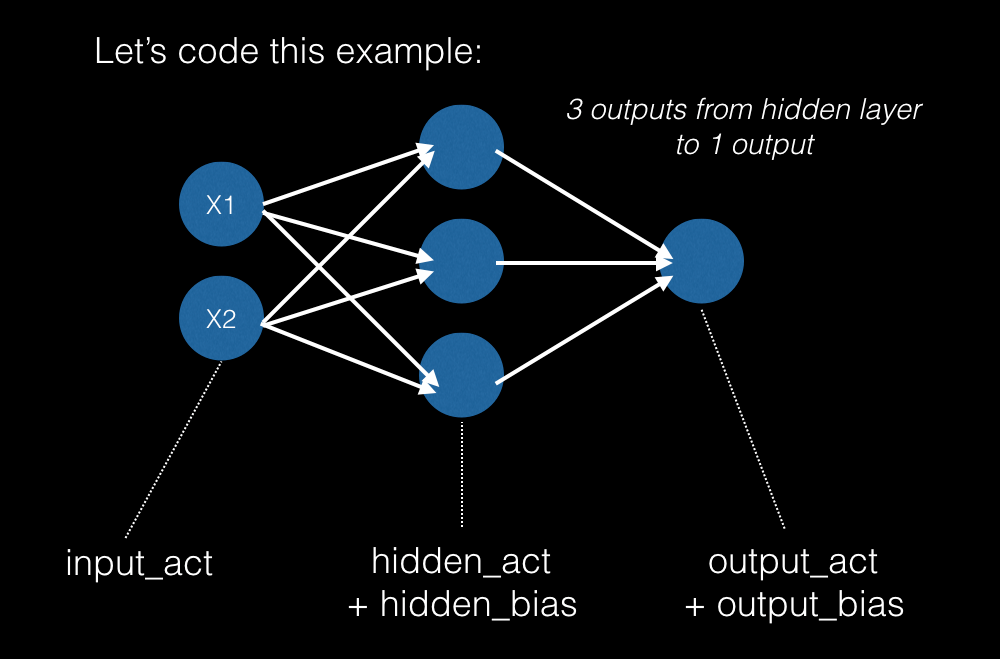

Typically, we'll apply the weights in our neurons, add the bias and sum all terms, then pass that one value through the activation function, like this:

In [28]:
def linear(x):
    return x

In [24]:
def forward_one_layer(input_layer, weights, biases, activation_function=linear):
    output = activation_function(np.dot(weights, input_layer) + biases)
    return output

### Picking a Topology for your Network

There's no hard and fast rule for how to pick a topology for your neural network. Much like hyperparameters in other machine learning models, we're going to use a combination of experience, research, and exploration to come up with a topology that best suits our unique problem. One good place to start out is to (if you have a smaller set of input features) is a network with:

1. The input layer
2. One hidden layer with a number of neurons equal to the number of inputs
3. One output layer with the appropriate activation function (softmax if you have a classification problem, no activation (or what's known as the identity function ($f(x) = x$) if you have a regression problem

See also: [the "zoo" neural nets](http://www.asimovinstitute.org/neural-network-zoo/)

### Single Layer and Multilayer Perceptrons (SLP and MLP)

The types of neural networks that we have discussed so far are known as perceptrons. A single layer perceptron **has no hidden layers** and is just a function of the inputs, weights, a bias term, and an activation function:

![](./images/slp.png)

Multilayer perceptrons (MLP) have 1 or more hidden layers in addition to their input and output layers. While SLPs are easiest to consider in an abstract sense, MLPs tend to be much more accurate and useful in practice. 

## Training your network

So far, we haven't discussed how a neural network assigns the "right" weights to each of its neurons. You could imagine a neural network with very bad weights that predicted poorly or, in some cases, completely counter to what it should. How do we train our network to have the right weights?

Training our network to have the right weights relies on a couple of topics:

1. A loss function that we are trying to optimize the values for
2. The concept of forward and backward propogation 
3. Gradient Descent and a Learning Rate to make iterative changes to the weights

### Loss Functions

We have encountered [loss functions](https://en.wikipedia.org/wiki/Loss_function) many times before -- they are functions that take in the actual values for the output and what our model predicts those values to be and gives us a value that we are trying to minimize with our model. Examples include:

##### Regression: Sum of Squared Errors

$$\sum(y_i - \hat{y}_i)^2$$

##### Classification: Cross entropy, hinge loss

We're going to use loss functions in this context to tell us how well or how poorly our Neural Network is doing at assigning correct labels.

> Here is a cool [cheat sheet of loss functions](http://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html).

### Forward and Backpropagation 

When we train our neural network, **we send our data multiple times through the network and tweak the weights each time**. This is an iterative process using forward and backpropagation.


#### Forward Propagation

Forward Propagation is straightforward -- either in batches or as individual observations, pass the training data through the network, applying all the weights, biases, and activation functions as usual. At this point, you should have actual and predicted values.

#### Backpropagation

What we want to do here is:

1. See how far off we were from the truth using the loss function
2. Identify which weights in our network are most responsible for how far we are off
3. Change all of the weights to make our model more accurate, changing the weights that are "the worst" the most

This is known as **Backpropagation** -- we are taking the errors we see in our model (as it stands currently) and are distributing them backwards to the rest of the layers. 

What we'll do is train our data in a number of full passes known as **epochs**. As modelers, we'll choose a number of epochs to train our model, essentially choosing a value to stop where we see no additional change in the accuracy of our models. 

#### Changing Weights (the Curse of Dimensionality) 

One question that you may have is "Why don't we just try all of the weights and decisively find the best one?" The problem here (which is often known as the curse of dimensionality) is that we have _so many different weights_ to try out (and so many different sets of values to exhaustively attempt) that it's impractical to try all of them. More than being impractical, for larger models with many weights and many possible values, we may still be estimating the "best" weights long past the [heat death of the universe](https://en.wikipedia.org/wiki/Heat_death_of_the_universe). 

#### **Estimating** the Weights 

What we'll do instead is use gradient descent to help us figure out what direction to tweak our weights. We've discussed gradient descent before, but as a quick primer: 

> Gradient Descent is an optimization technique to help us find the lowest point (global minima) of a function. The derivative (the rate of change in the function for a small change in the inputs) of a function at a given point tells which direction we would like to change our weights. We'll make changes of a certain size in the right direction until we hit a place where the derivative is zero (i.e., either direction will increase the output of the function) and will consider that our "best" place. 

> _In Keras, you will be using "Adam" optimization which is roughly a method similar to Gradient Descent, however, it does try to be smart about adjusting the learning rate and is possible to set parameters that can control how it might respond.  Generally, the takeaway is that it's roughly a version of gradient descent._

- **Learning Rate**: The size of the change we make on each pass -- bigger learning rates mean we'll move faster, but may skip over places where there is actually a global minima
- **Epoch**: The number of times we pass our data through the fitting process

![](./images/gradient.png)

For our purposes, the function we're trying to optimize is the loss function from above -- we want the value of that function to be as low as possible. Our loss function is a function of all of the weights in our network. What we'll do in an abstract sense is:

1. Take the partial derivative (in other words, changing one weight and not all) of our loss function with respect to each weight in our model
2. Based on that derivative, change the weights up or down

The actual process is somewhat more complicated than that (see below), but the takeaway is backpropagation **looks at how badly we did on each pass, moves those errors back up the model, and then uses gradient descent to change the weight over a series of iterations**.

![](./images/backprop.jpg)

##### The Vanishing Gradient Problem

One thing to keep in mind (and a good reason to not create networks that are very, very deep) is a phenomenon known as the Vanishing Gradient Problem. For networks with lots of hidden layers, earlier layers train at a much slower rate than layers closer to the output (the gradient "vanishes" as it gets deeper into the network, so the weights cannot change as much). That means that it can take a much longer time to train a deeper network without much increase in accuracy. 

### Tackling Overfitting

Do neural networks overfit? Yes, very much so. There are many weights to optimize and we can very quickly reach a point where the weights in each neuron are overfit to our training data (and therefore are limited in how well they predict new data).

#### Regularization

Just like with linear models earlier in this course, we can also do regularization to make sure our weights are more generalizable. Because we're using our loss function to determine how we should change our weights, if we penalize the loss function to avoid larger weights, we will see the same behavior as we did with linear models -- weights will be large or impactful only if they contribute sufficiently to how well the model fits as a whole. 

#### Dropout

We can also use something known as dropout to tackle overfitting. Dropout will turn off a random percentage of neurons in each pass (user-defined). This prevents each layer from fitting too strongly to a given input and therefore wards off overfitting. 

![](./images/dropout.png)

### (time permitting) Check for Understanding 3 (10 Minutes)

In pairs, use the [Tensorflow Playground](http://playground.tensorflow.org/) with the following settings:

![](./images/settings.png)

> make sure that you're using a classification problem (upper right corner as well!)

1. In your own words, define the following and forecast what changing each of them will do to your model?
    1. Learning Rate
    2. Activation Function
    3. Regularization and Regularization Rate
2. Work together with the settings established above to create a (mini!) neural network that best predicts test data. Feel free to try any (or all!) of the inputs, any number of neurons, hidden layers, learning rates, regularization parameters, and activation functions. A good place to start is the following:

![](./images/starting.png)

We'll share our results in Slack after 10 minutes. Include your test loss on the thread. We'll ask the pair with the best score to share their settings for the best possible network. 

### Conclusion
Anatomy / topology of a neural network:
- Input layer
- Hidden layers
- Activation functions
- Output activation
<img src="https://snag.gy/PfMEFk.jpg">

Neurons are connected by weights:
<img src="https://snag.gy/quxcSn.jpg">

Activation is the sum of the weights + bias:
<img src="https://snag.gy/2xAVGu.jpg">

Backpropagation is basically gradient descent for neural networks:
- Loss functions
- Learning rate
- Epoch
- Regularization and drop-out

Networks are trained through a process of **feed forward** and **backpropagation**.